In [2]:
import pandas as pd
import numpy as np
import bilby
import pickle

import matplotlib.pyplot as plt

In [26]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyana/Documents/PhDThesisPlots/matplotlibrc')

mpl.rc('xtick', labelsize = 16) 
mpl.rc('ytick', labelsize = 16)

In [4]:
my_color = '#97a7a7'
my_color_darker = '#2f4f4f'
my_color2 = '#f8c997'
my_color2_darker = '#f6b26b'

In [5]:
columns_lbs = ['H0', 'Om0', 'alpha', 'beta', 'mmin', 'mmax', 'delta_m', 'mu_g', 'sigma_g', 'lambda_peak',
               'gamma', 'kappa', 'zp', 'R0']
lbs = [ '$H_0$',#\n [km s$^{-1}$ Mpc$^{-1}$]', 
        '$\\Omega_{\\rm m,0}$', 
        '$\\alpha$', 
        '$\\beta$', 
        '$m_{\\rm min}$',#\n [$M_{\odot}$]', 
        '$m_{\\rm max}$',#\n [$M_{\odot}$]', 
        '$\\delta m$',#\n [$M_{\odot}$]', 
        '$\\mu_{\\rm g}$',#\n [$M_{\odot}$]', 
        '$\\sigma_{\\rm g}$',#\n [$M_{\odot}$]', 
        '$\\lambda_{\\rm peak}$', 
        '$\gamma$', 
        '$\kappa$', 
        '$z_{\\rm p}$', 
        '$R_0$']#\n [Gpc$^{-3}$yr$^{-1}$]']

lbs_dict = {'H0':'$H_0$ [km s$^{-1}$ Mpc$^{-1}$]', 
        'Om0':'$\\Omega_{\\rm m,0}$', 
        'alpha':'$\\alpha$', 
        'beta':'$\\beta$', 
        'mmin':'$m_{\\rm min}$ [$M_{\odot}$]', 
        'mmax':'$m_{\\rm max}$ [$M_{\odot}$]', 
        'delta_m':'$\\delta m$ [$M_{\odot}$]', 
        'mu_g':'$\\mu_{\\rm g}$ [$M_{\odot}$]', 
        'sigma_g':'$\\sigma_{\\rm g}$ [$M_{\odot}$]', 
        'lambda_peak':'$\\lambda_{\\rm peak}$', 
        'gamma':'$\gamma$', 
        'kappa':'$\kappa$', 
        'zp':'$z_{\\rm p}$', 
        'R0':'$R_0$ [Gpc$^{-3}$yr$^{-1}$]'}

In [6]:
injected_values_vanilla = {'H0':67.8, 
                   'Om0':0.3, 
                   'alpha':3.4, 
                   'beta':0.8, 
                   'mmin':5, 
                   'mmax':100, 
                   'delta_m':4.8, 
                   'mu_g':35, 
                   'sigma_g':3.9, 
                   'lambda_peak':0.04, 
                   'gamma':2.7, 
                   'kappa':2.9, 
                   'zp':1.9,
                   'R0':20}

injected_values_redshift = {'H0':173.28, 
                   'Om0':0.3, 
                   'alpha':5.325, 
                   'beta':3.05, 
                   'mmin':7.8, 
                   'mmax':87.58, 
                   'delta_m':3.19, 
                   'mu_g':40.9, 
                   'sigma_g':7.63, 
                   'lambda_peak':0.04, 
                   'gamma':0.03, 
                   'kappa':2.92, 
                   'zp':3.86,
                   'R0':16.1}

In [9]:
# Vanilla case
# load dictionary of events
case1_dictionary_path = 'data/case1_events_dictionary.pkl'
with open(case1_dictionary_path, 'rb') as f:
    case1_dict = pickle.load(f)
    
# load dictionary of labels 
case1_dictionary_path = 'data/case1_events_lbl_dictionary.pkl'
with open(case1_dictionary_path, 'rb') as f:
    case1_lbl_dict = pickle.load(f)

In [10]:
# Redshift-Dependent case
# load dictionary of events
case2_dictionary_path = 'data/case2_events_dictionary.pkl'
with open(case2_dictionary_path, 'rb') as f:
    case2_dict = pickle.load(f)
    
# load dictionary of labels 
case2_dictionary_path = 'data/case2_events_lbl_dictionary.pkl'
with open(case2_dictionary_path, 'rb') as f:
    case2_lbl_dict = pickle.load(f)

In [11]:
vanilla_data_path = case1_dict['case1_inj_number']['case1_1e6inj_286ev']
redshift_data_path = case2_dict['case2_inj_number']['case2_1e5inj_80ev']

vanilla_data = bilby.core.result.read_in_result(vanilla_data_path)
vanilla_data_posteriors = vanilla_data.posterior[columns_lbs]

redshift_data = bilby.core.result.read_in_result(redshift_data_path)
redshift_data_posteriors = redshift_data.posterior[columns_lbs]

In [12]:
low_cl = 16
high_cl = 84

In [13]:
vanilla_medians = {
        'H0':np.round(np.median(vanilla_data_posteriors['H0']), 2), 
        'Om0':np.round(np.median(vanilla_data_posteriors['Om0']), 2), 
        'alpha':np.round(np.median(vanilla_data_posteriors['alpha']), 2), 
        'beta':np.round(np.median(vanilla_data_posteriors['beta']), 2), 
        'mmin':np.round(np.median(vanilla_data_posteriors['mmin']), 2), 
        'mmax':np.round(np.median(vanilla_data_posteriors['mmax']), 2), 
        'delta_m':np.round(np.median(vanilla_data_posteriors['delta_m']), 2), 
        'mu_g':np.round(np.median(vanilla_data_posteriors['mu_g']), 2), 
        'sigma_g':np.round(np.median(vanilla_data_posteriors['sigma_g']), 2), 
        'lambda_peak':np.round(np.median(vanilla_data_posteriors['lambda_peak']), 2), 
        'gamma':np.round(np.median(vanilla_data_posteriors['gamma']), 2), 
        'kappa':np.round(np.median(vanilla_data_posteriors['kappa']), 2), 
        'zp':np.round(np.median(vanilla_data_posteriors['zp']), 2), 
        'R0':np.round(np.median(vanilla_data_posteriors['R0']), 2)
}

In [14]:
vanilla_low = {
        'H0':np.round(np.median(vanilla_data_posteriors['H0'])-np.percentile(vanilla_data_posteriors['H0'], low_cl), 2), 
        'Om0':np.round(np.median(vanilla_data_posteriors['Om0'])-np.percentile(vanilla_data_posteriors['Om0'], low_cl), 2), 
        'alpha':np.round(np.median(vanilla_data_posteriors['alpha'])-np.percentile(vanilla_data_posteriors['alpha'], low_cl), 2), 
        'beta':np.round(np.median(vanilla_data_posteriors['beta'])-np.percentile(vanilla_data_posteriors['beta'], low_cl), 2), 
        'mmin':np.round(np.median(vanilla_data_posteriors['mmin'])-np.percentile(vanilla_data_posteriors['mmin'], low_cl), 2), 
        'mmax':np.round(np.median(vanilla_data_posteriors['mmax'])-np.percentile(vanilla_data_posteriors['mmax'], low_cl), 2), 
        'delta_m':np.round(np.median(vanilla_data_posteriors['delta_m'])-np.percentile(vanilla_data_posteriors['delta_m'], low_cl), 2), 
        'mu_g':np.round(np.median(vanilla_data_posteriors['mu_g'])-np.percentile(vanilla_data_posteriors['mu_g'], low_cl), 2), 
        'sigma_g':np.round(np.median(vanilla_data_posteriors['sigma_g'])-np.percentile(vanilla_data_posteriors['sigma_g'], low_cl), 2), 
        'lambda_peak':np.round(np.median(vanilla_data_posteriors['lambda_peak'])-np.percentile(vanilla_data_posteriors['lambda_peak'], low_cl), 2), 
        'gamma':np.round(np.median(vanilla_data_posteriors['gamma'])-np.percentile(vanilla_data_posteriors['gamma'], low_cl), 2), 
        'kappa':np.round(np.median(vanilla_data_posteriors['kappa'])-np.percentile(vanilla_data_posteriors['kappa'], low_cl), 2), 
        'zp':np.round(np.median(vanilla_data_posteriors['zp'])-np.percentile(vanilla_data_posteriors['zp'], low_cl), 2), 
        'R0':np.round(np.median(vanilla_data_posteriors['R0'])-np.percentile(vanilla_data_posteriors['R0'], low_cl), 2)
}

In [15]:
vanilla_high = {
        'H0':np.round(np.percentile(vanilla_data_posteriors['H0'], high_cl)-np.median(vanilla_data_posteriors['H0']), 2), 
        'Om0':np.round(np.percentile(vanilla_data_posteriors['Om0'], high_cl)-np.median(vanilla_data_posteriors['Om0']), 2), 
        'alpha':np.round(np.percentile(vanilla_data_posteriors['alpha'], high_cl)-np.median(vanilla_data_posteriors['alpha']), 2), 
        'beta':np.round(np.percentile(vanilla_data_posteriors['beta'], high_cl)-np.median(vanilla_data_posteriors['beta']), 2), 
        'mmin':np.round(np.percentile(vanilla_data_posteriors['mmin'], high_cl)-np.median(vanilla_data_posteriors['mmin']), 2), 
        'mmax':np.round(np.percentile(vanilla_data_posteriors['mmax'], high_cl)-np.median(vanilla_data_posteriors['mmax']), 2), 
        'delta_m':np.round(np.percentile(vanilla_data_posteriors['delta_m'], high_cl)-np.median(vanilla_data_posteriors['delta_m']), 2), 
        'mu_g':np.round(np.percentile(vanilla_data_posteriors['mu_g'], high_cl)-np.median(vanilla_data_posteriors['mu_g']), 2), 
        'sigma_g':np.round(np.percentile(vanilla_data_posteriors['sigma_g'], high_cl)-np.median(vanilla_data_posteriors['sigma_g']), 2), 
        'lambda_peak':np.round(np.percentile(vanilla_data_posteriors['lambda_peak'], high_cl)-np.median(vanilla_data_posteriors['lambda_peak']), 2), 
        'gamma':np.round(np.percentile(vanilla_data_posteriors['gamma'], high_cl)-np.median(vanilla_data_posteriors['gamma']), 2), 
        'kappa':np.round(np.percentile(vanilla_data_posteriors['kappa'], high_cl)-np.median(vanilla_data_posteriors['kappa']), 2), 
        'zp':np.round(np.percentile(vanilla_data_posteriors['zp'], high_cl)-np.median(vanilla_data_posteriors['zp']), 2), 
        'R0':np.round(np.percentile(vanilla_data_posteriors['R0'], high_cl)-np.median(vanilla_data_posteriors['R0']), 2)
}

In [16]:
redshift_medians = {
        'H0':np.round(np.median(redshift_data_posteriors['H0']), 2), 
        'Om0':np.round(np.median(redshift_data_posteriors['Om0']), 2), 
        'alpha':np.round(np.median(redshift_data_posteriors['alpha']), 2), 
        'beta':np.round(np.median(redshift_data_posteriors['beta']), 2), 
        'mmin':np.round(np.median(redshift_data_posteriors['mmin']), 2), 
        'mmax':np.round(np.median(redshift_data_posteriors['mmax']), 2), 
        'delta_m':np.round(np.median(redshift_data_posteriors['delta_m']), 2), 
        'mu_g':np.round(np.median(redshift_data_posteriors['mu_g']), 2), 
        'sigma_g':np.round(np.median(redshift_data_posteriors['sigma_g']), 2), 
        'lambda_peak':np.round(np.median(redshift_data_posteriors['lambda_peak']), 2), 
        'gamma':np.round(np.median(redshift_data_posteriors['gamma']), 2), 
        'kappa':np.round(np.median(redshift_data_posteriors['kappa']), 2), 
        'zp':np.round(np.median(redshift_data_posteriors['zp']), 2), 
        'R0':np.round(np.median(redshift_data_posteriors['R0']), 2)
}

In [17]:
redshift_low = {
        'H0':np.round(np.median(redshift_data_posteriors['H0'])-np.percentile(redshift_data_posteriors['H0'], low_cl), 2), 
        'Om0':np.round(np.median(redshift_data_posteriors['Om0'])-np.percentile(redshift_data_posteriors['Om0'], low_cl), 2), 
        'alpha':np.round(np.median(redshift_data_posteriors['alpha'])-np.percentile(redshift_data_posteriors['alpha'], low_cl), 2), 
        'beta':np.round(np.median(redshift_data_posteriors['beta'])-np.percentile(redshift_data_posteriors['beta'], low_cl), 2), 
        'mmin':np.round(np.median(redshift_data_posteriors['mmin'])-np.percentile(redshift_data_posteriors['mmin'], low_cl), 2), 
        'mmax':np.round(np.median(redshift_data_posteriors['mmax'])-np.percentile(redshift_data_posteriors['mmax'], low_cl), 2), 
        'delta_m':np.round(np.median(redshift_data_posteriors['delta_m'])-np.percentile(redshift_data_posteriors['delta_m'], low_cl), 2), 
        'mu_g':np.round(np.median(redshift_data_posteriors['mu_g'])-np.percentile(redshift_data_posteriors['mu_g'], low_cl), 2), 
        'sigma_g':np.round(np.median(redshift_data_posteriors['sigma_g'])-np.percentile(redshift_data_posteriors['sigma_g'], low_cl), 2), 
        'lambda_peak':np.round(np.median(redshift_data_posteriors['lambda_peak'])-np.percentile(redshift_data_posteriors['lambda_peak'], low_cl), 2), 
        'gamma':np.round(np.median(redshift_data_posteriors['gamma'])-np.percentile(redshift_data_posteriors['gamma'], low_cl), 2), 
        'kappa':np.round(np.median(redshift_data_posteriors['kappa'])-np.percentile(redshift_data_posteriors['kappa'], low_cl), 2), 
        'zp':np.round(np.median(redshift_data_posteriors['zp'])-np.percentile(redshift_data_posteriors['zp'], low_cl), 2), 
        'R0':np.round(np.median(redshift_data_posteriors['R0'])-np.percentile(redshift_data_posteriors['R0'], low_cl), 2)
}

In [18]:
redshift_high = {
        'H0':np.round(np.percentile(redshift_data_posteriors['H0'], high_cl)-np.median(redshift_data_posteriors['H0']), 2), 
        'Om0':np.round(np.percentile(redshift_data_posteriors['Om0'], high_cl)-np.median(redshift_data_posteriors['Om0']), 2), 
        'alpha':np.round(np.percentile(redshift_data_posteriors['alpha'], high_cl)-np.median(redshift_data_posteriors['alpha']), 2), 
        'beta':np.round(np.percentile(redshift_data_posteriors['beta'], high_cl)-np.median(redshift_data_posteriors['beta']), 2), 
        'mmin':np.round(np.percentile(redshift_data_posteriors['mmin'], high_cl)-np.median(redshift_data_posteriors['mmin']), 2), 
        'mmax':np.round(np.percentile(redshift_data_posteriors['mmax'], high_cl)-np.median(redshift_data_posteriors['mmax']), 2), 
        'delta_m':np.round(np.percentile(redshift_data_posteriors['delta_m'], high_cl)-np.median(redshift_data_posteriors['delta_m']), 2), 
        'mu_g':np.round(np.percentile(redshift_data_posteriors['mu_g'], high_cl)-np.median(redshift_data_posteriors['mu_g']), 2), 
        'sigma_g':np.round(np.percentile(redshift_data_posteriors['sigma_g'], high_cl)-np.median(redshift_data_posteriors['sigma_g']), 2), 
        'lambda_peak':np.round(np.percentile(redshift_data_posteriors['lambda_peak'], high_cl)-np.median(redshift_data_posteriors['lambda_peak']), 2), 
        'gamma':np.round(np.percentile(redshift_data_posteriors['gamma'], high_cl)-np.median(redshift_data_posteriors['gamma']), 2), 
        'kappa':np.round(np.percentile(redshift_data_posteriors['kappa'], high_cl)-np.median(redshift_data_posteriors['kappa']), 2), 
        'zp':np.round(np.percentile(redshift_data_posteriors['zp'], high_cl)-np.median(redshift_data_posteriors['zp']), 2), 
        'R0':np.round(np.percentile(redshift_data_posteriors['R0'], high_cl)-np.median(redshift_data_posteriors['R0']), 2)
}

In [19]:
injected_vanilla_normalized = {
        'H0':injected_values_vanilla['H0']/np.median(vanilla_data_posteriors['H0']), 
        'Om0':injected_values_vanilla['Om0']/np.median(vanilla_data_posteriors['Om0']), 
        'alpha':injected_values_vanilla['alpha']/np.median(vanilla_data_posteriors['alpha']), 
        'beta':injected_values_vanilla['beta']/np.median(vanilla_data_posteriors['beta']), 
        'mmin':injected_values_vanilla['mmin']/np.median(vanilla_data_posteriors['mmin']), 
        'mmax':injected_values_vanilla['mmax']/np.median(vanilla_data_posteriors['mmax']), 
        'delta_m':injected_values_vanilla['delta_m']/np.median(vanilla_data_posteriors['delta_m']), 
        'mu_g':injected_values_vanilla['mu_g']/np.median(vanilla_data_posteriors['mu_g']), 
        'sigma_g':injected_values_vanilla['sigma_g']/np.median(vanilla_data_posteriors['sigma_g']), 
        'lambda_peak':injected_values_vanilla['lambda_peak']/np.median(vanilla_data_posteriors['lambda_peak']), 
        'gamma':injected_values_vanilla['gamma']/np.median(vanilla_data_posteriors['gamma']), 
        'kappa':injected_values_vanilla['kappa']/np.median(vanilla_data_posteriors['kappa']), 
        'zp':injected_values_vanilla['zp']/np.median(vanilla_data_posteriors['zp']), 
        'R0':injected_values_vanilla['R0']/np.median(vanilla_data_posteriors['R0'])
}

In [20]:
injected_redshift_normalized = {
        'H0':injected_values_redshift['H0']/np.median(redshift_data_posteriors['H0']), 
        'Om0':injected_values_redshift['Om0']/np.median(redshift_data_posteriors['Om0']), 
        'alpha':injected_values_redshift['alpha']/np.median(redshift_data_posteriors['alpha']), 
        'beta':injected_values_redshift['beta']/np.median(redshift_data_posteriors['beta']), 
        'mmin':injected_values_redshift['mmin']/np.median(redshift_data_posteriors['mmin']), 
        'mmax':injected_values_redshift['mmax']/np.median(redshift_data_posteriors['mmax']), 
        'delta_m':injected_values_redshift['delta_m']/np.median(redshift_data_posteriors['delta_m']), 
        'mu_g':injected_values_redshift['mu_g']/np.median(redshift_data_posteriors['mu_g']), 
        'sigma_g':injected_values_redshift['sigma_g']/np.median(redshift_data_posteriors['sigma_g']), 
        'lambda_peak':injected_values_redshift['lambda_peak']/np.median(redshift_data_posteriors['lambda_peak']), 
        'gamma':injected_values_redshift['gamma']/np.median(redshift_data_posteriors['gamma']), 
        'kappa':injected_values_redshift['kappa']/np.median(redshift_data_posteriors['kappa']), 
        'zp':injected_values_redshift['zp']/np.median(redshift_data_posteriors['zp']), 
        'R0':injected_values_redshift['R0']/np.median(redshift_data_posteriors['R0'])
}

In [21]:
vanilla_data_normed_posteriors = pd.DataFrame.from_dict({
        'H0':vanilla_data_posteriors['H0']/np.median(vanilla_data_posteriors['H0']), 
        'Om0':vanilla_data_posteriors['Om0']/np.median(vanilla_data_posteriors['Om0']), 
        'alpha':vanilla_data_posteriors['alpha']/np.median(vanilla_data_posteriors['alpha']), 
        'beta':vanilla_data_posteriors['beta']/np.median(vanilla_data_posteriors['beta']), 
        'mmin':vanilla_data_posteriors['mmin']/np.median(vanilla_data_posteriors['mmin']), 
        'mmax':vanilla_data_posteriors['mmax']/np.median(vanilla_data_posteriors['mmax']), 
        'delta_m':vanilla_data_posteriors['delta_m']/np.median(vanilla_data_posteriors['delta_m']), 
        'mu_g':vanilla_data_posteriors['mu_g']/np.median(vanilla_data_posteriors['mu_g']), 
        'sigma_g':vanilla_data_posteriors['sigma_g']/np.median(vanilla_data_posteriors['sigma_g']), 
        'lambda_peak':vanilla_data_posteriors['lambda_peak']/np.median(vanilla_data_posteriors['lambda_peak']), 
        'gamma':vanilla_data_posteriors['gamma']/np.median(vanilla_data_posteriors['gamma']), 
        'kappa':vanilla_data_posteriors['kappa']/np.median(vanilla_data_posteriors['kappa']), 
        'zp':vanilla_data_posteriors['zp']/np.median(vanilla_data_posteriors['zp']), 
        'R0':vanilla_data_posteriors['R0']/np.median(vanilla_data_posteriors['R0'])
})

In [22]:
redshift_data_normed_posteriors = pd.DataFrame.from_dict({
        'H0':redshift_data_posteriors['H0']/np.median(redshift_data_posteriors['H0']), 
        'Om0':redshift_data_posteriors['Om0']/np.median(redshift_data_posteriors['Om0']), 
        'alpha':redshift_data_posteriors['alpha']/np.median(redshift_data_posteriors['alpha']), 
        'beta':redshift_data_posteriors['beta']/np.median(redshift_data_posteriors['beta']), 
        'mmin':redshift_data_posteriors['mmin']/np.median(redshift_data_posteriors['mmin']), 
        'mmax':redshift_data_posteriors['mmax']/np.median(redshift_data_posteriors['mmax']), 
        'delta_m':redshift_data_posteriors['delta_m']/np.median(redshift_data_posteriors['delta_m']), 
        'mu_g':redshift_data_posteriors['mu_g']/np.median(redshift_data_posteriors['mu_g']), 
        'sigma_g':redshift_data_posteriors['sigma_g']/np.median(redshift_data_posteriors['sigma_g']), 
        'lambda_peak':redshift_data_posteriors['lambda_peak']/np.median(redshift_data_posteriors['lambda_peak']), 
        'gamma':redshift_data_posteriors['gamma']/np.median(redshift_data_posteriors['gamma']), 
        'kappa':redshift_data_posteriors['kappa']/np.median(redshift_data_posteriors['kappa']), 
        'zp':redshift_data_posteriors['zp']/np.median(redshift_data_posteriors['zp']), 
        'R0':redshift_data_posteriors['R0']/np.median(redshift_data_posteriors['R0'])
})

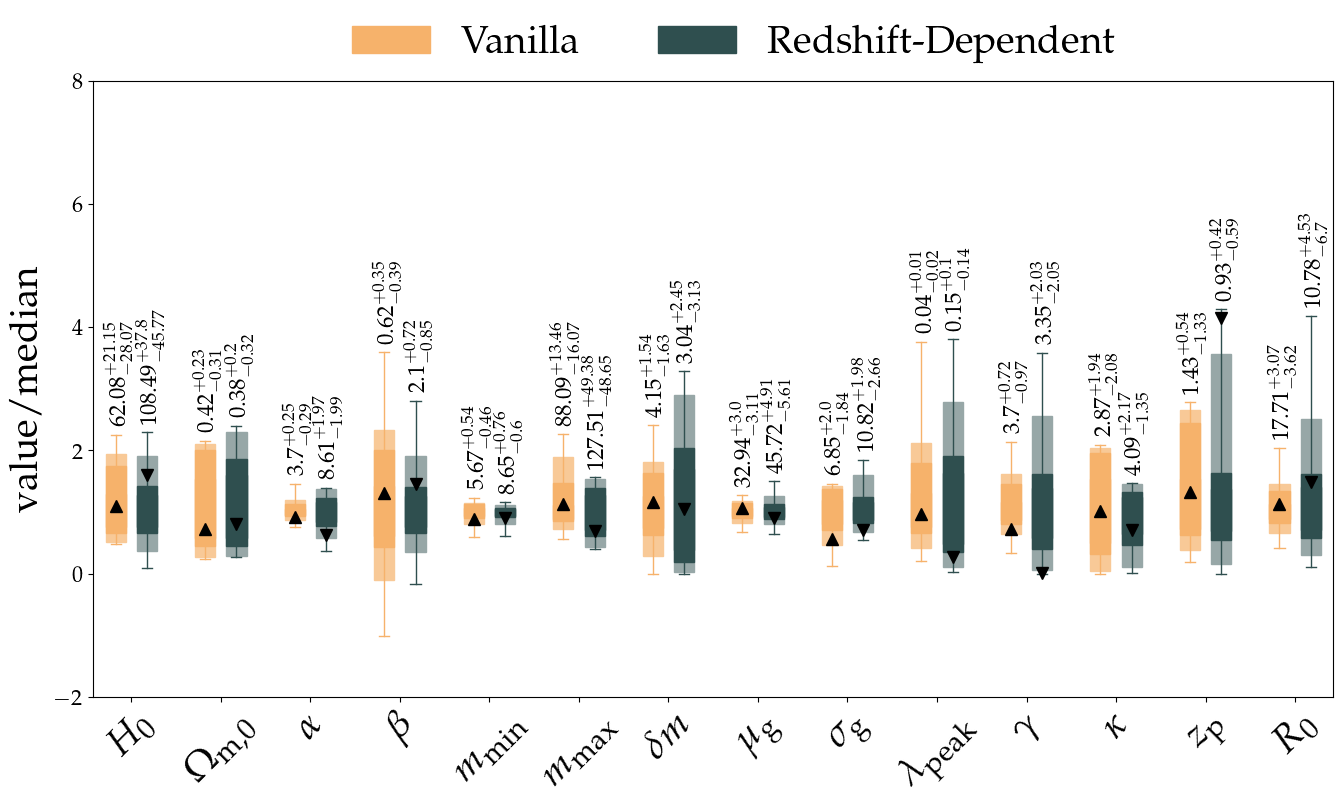

In [34]:
# summary plot full page
fig, ax = plt.subplots(1,1, figsize = (16,8)) 

vanilla_pos = [0.65,2.65,4.65,6.65,8.65,10.65,12.65,14.65,16.65,18.65,20.65,22.65,24.65,26.65]
redshift_pos = [1.35,3.35,5.35,7.35,9.35,11.35,13.35,15.35,17.35,19.35,21.35,23.35,25.35,27.35]
x_pos = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]

bp1 = ax.boxplot(vanilla_data_normed_posteriors, patch_artist=True, 
            positions=vanilla_pos,
            whis=[0,100],
            boxprops=dict(facecolor=my_color2_darker, color=my_color2_darker), widths=0.45,
            whiskerprops=dict(color = my_color2_darker), capprops=dict(color = my_color2_darker),
            medianprops=dict(color='black', linewidth=0.), 
            showfliers=False)
bp2 = ax.boxplot(redshift_data_normed_posteriors, patch_artist=True, 
            positions=redshift_pos,
            whis=[0,100],
            boxprops=dict(facecolor=my_color_darker, color=my_color_darker), widths=0.45,
            whiskerprops=dict(color = my_color_darker), capprops=dict(color = my_color_darker),
            medianprops=dict(color='black', linewidth=0.), 
            showfliers=False)

for i, param in enumerate(columns_lbs):
    vanilla_percentiles_1s = np.percentile(vanilla_data_normed_posteriors[param], [16, 94])
    vanilla_percentiles_2s = np.percentile(vanilla_data_normed_posteriors[param], [2.3, 97.7])

    fig.gca().add_patch(plt.Rectangle((vanilla_pos[i]-0.225, vanilla_percentiles_2s[0]), 0.45, 
                                      vanilla_percentiles_2s[1] - vanilla_percentiles_2s[0],
                        fill=True, color=my_color2, alpha=1.))
    fig.gca().add_patch(plt.Rectangle((vanilla_pos[i]-0.225, vanilla_percentiles_1s[0]), 0.45, 
                                      vanilla_percentiles_1s[1] - vanilla_percentiles_1s[0],
                        fill=True, color=my_color2_darker, alpha=1.))
    plt.annotate('$%s^{+%s}_{-%s}$' %(vanilla_medians[param], vanilla_low[param], vanilla_high[param]),   
                 xy=(vanilla_pos[i]-0.25, np.max(vanilla_data_normed_posteriors[param])), 
                 xytext=(vanilla_pos[i]-0.25, np.max(vanilla_data_normed_posteriors[param])+0.25),
                 fontsize=16.5, rotation = 90)
    
    redshift_percentiles_1s = np.percentile(redshift_data_normed_posteriors[param], [16, 84])
    redshift_percentiles_2s = np.percentile(redshift_data_normed_posteriors[param], [2.3, 97.7])
    fig.gca().add_patch(plt.Rectangle((redshift_pos[i]-0.225, redshift_percentiles_2s[0]), 0.45, 
                                      redshift_percentiles_2s[1] - redshift_percentiles_2s[0],
                        fill=True, color=my_color, alpha=1.))
    fig.gca().add_patch(plt.Rectangle((redshift_pos[i]-0.225, redshift_percentiles_1s[0]), 0.45, 
                                      redshift_percentiles_1s[1] - redshift_percentiles_1s[0],
                        fill=True, color=my_color_darker, alpha=1.))

    plt.annotate('$%s^{+%s}_{-%s}$' %(redshift_medians[param], redshift_low[param], redshift_high[param]),   
                 xy=(redshift_pos[i]-0.25, np.max(redshift_data_normed_posteriors[param])), 
                 xytext=(redshift_pos[i]-0.25, np.max(redshift_data_normed_posteriors[param])+0.25),
                 fontsize=16.5, rotation = 90)

ax.set_xticks(x_pos)
ax.set_xticklabels(lbs, rotation=45, fontsize=28)
plt.ylabel('value/median', fontsize=28)
fig.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Vanilla', 'Redshift-Dependent'], 
                 fontsize=28, bbox_to_anchor=(0.525, 0.925), loc='center', 
                 ncol = 2, frameon=False)
ax.set_ylim(-2, 8)

for i, param in enumerate(columns_lbs):
    ax.plot(vanilla_pos[i], injected_vanilla_normalized[param], color = 'black', 
        marker='^', markersize=8.5)
    ax.plot(redshift_pos[i], injected_redshift_normalized[param], color = 'black', 
        marker='v', markersize=8.5)
    
plt.savefig('plots/summary_plot_full_page.pdf', bbox_inches='tight')
plt.show()

### 